In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

data = pd.read_csv('WhatsAppChat.txt', delimiter = "\t", header = None, names = ['text'])


In [2]:
# Extract datetime
data[['datetime_str','text_2']] = data["text"].str.split(" - ", 1, expand=True)
data["datetime"] = pd.to_datetime(data["datetime_str"], format="%d/%m/%Y, %I:%M %p", errors='coerce')
#data = data.dropna(subset=['datetime'])
#data = data.drop(columns = ['datetime_str'])

In [3]:
# Extract sender and message
data[['sender','text_message']] = data['text_2'].str.split(': ', 1, expand=True)
data = data.dropna(subset=['text_message'])
data = data.drop(columns = ['text','text_2'])

In [5]:
data.describe()
data.tail()
data.head()


,datetime_str,datetime,sender,text_message
3,"27/11/2020, 08:35",NaT,Olivier Ngariri,Je suis pas admin ici 🤔
4,"27/11/2020, 08:36",NaT,Thomas Müller,"Quand tu as un objectif dans la vie, tu n’es p..."
6,"27/11/2020, 08:37",NaT,+235 60 44 47 45,Ça aussi c'est vrai
7,"27/11/2020, 08:37",NaT,Triplex Orange,😂😂
9,"27/11/2020, 08:38",NaT,Triplex Orange,"Mais qu’est-ce qui se passe même sur Facebook,..."


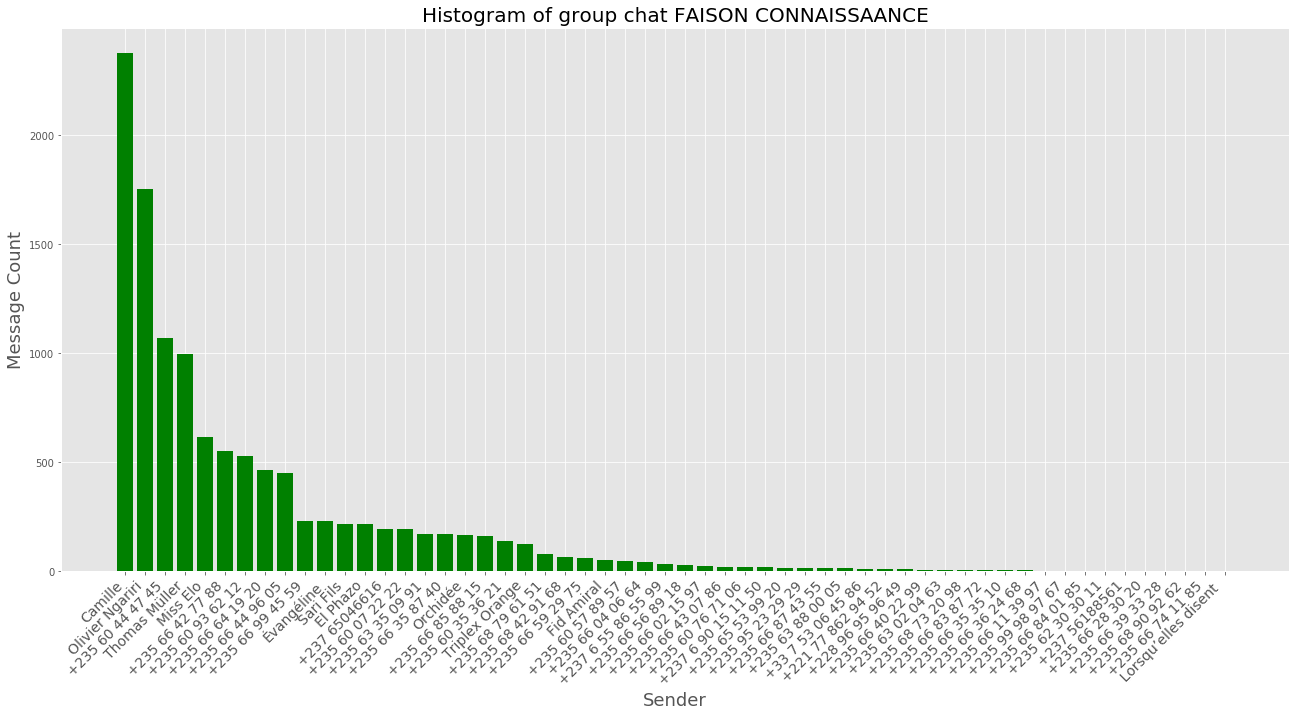

In [6]:
# Create sender counts as a series
sender_count_series = data.groupby(['sender']).size().sort_values(ascending=False)

# Create sender counts series as a DataFrame
sender_count_df = pd.DataFrame(sender_count_series)

# Reset index in order to name columns correctly
sender_count_df = sender_count_df.reset_index()
sender_count_df.columns = ['sender', 'count']

# Plot bar chart with sender message counts
plt.figure(figsize=(22, 10))
plt.title('Histogram of group chat FAISON CONNAISSAANCE', fontsize=20)
plt.bar(sender_count_df['sender'], sender_count_df['count'], color='green')
plt.xlabel("Sender", fontsize=18)
plt.ylabel("Message Count", fontsize=18)
plt.xticks(fontsize=14, rotation=45, ha="right")
plt.savefig('FCplot.png')
plt.show()

In [31]:
## Create DataFrame with all words used split by sender
# Filter out 'Media Omitted' messages
data_texts = data[~data['text_message'].str.contains('omitted')]

# Create empty DataFrame to use for the word count
words = pd.DataFrame(columns=['sender','words'])

# Loop through all messages in the DataFrame
for sender, message in zip(data_texts.sender, data_texts.text_message):
 
  # Split out each word in each message
  message_split = message.split()
  for word in message_split:
 
    # Add each word to the DataFrame
    words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)

# Remove punctuation from the start and end of words
words['words'] = words['words'].str.replace('(^\W)|(\W$)','')

# Create list of 'non-words' that we don't care about
non_words = ['le','la','a','il','pas','des','de','tu','je','quel','quelle','qui','que','on','ont','elles','ils','les','à','et','ça','es','est','ne','un','et','stp','est','pour', 'en','stp','ce','toi','suis','']

# Filter out this list of 'non-words' from each set of words
words_filtered = words[~words['words'].isin(non_words)]

# Create word counts as a series
word_count_total_series = words_filtered.groupby(['words']).size().sort_values(ascending=False)

# Create word counts series as a DataFrame
word_count_total = pd.DataFrame(word_count_total_series)

# Reset index in order to name columns correctly
word_count_total = word_count_total.reset_index()
word_count_total.columns = ['words', 'count']

# Display top 10 words used
word_count_total.head(10)

,words,count
0,c'est,700
1,😂,316
2,dans,267
3,une,234
4,là,231
5,oui,213
6,du,212
7,te,206
8,vous,203
9,au,194


In [33]:
# Find where a word comes in combined count
word_count_total[word_count_total['words'].isin(['fautes','politique','desolé','buvons','inopiné','demagogie','confinement','heureux','anniversaire'])]

,words,count
232,anniversaire,21
255,confinement,19
293,politique,17
856,buvons,6
3866,fautes,1
4772,desolé,1
7807,heureux,1
8015,inopiné,1
